In [1]:
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats
import datetime
pd.set_option('display.max_columns', None)

Чтение данных

In [2]:
apps = pd.read_csv('/content/googleplaystore.csv')
reviews = pd.read_csv('/content/googleplaystore_user_reviews.csv')

# Проведите очистку данных и необходимые преобразования для последующего анализа. Сделайте первичное исследование данных.

Очистка данных, преобразование, первичное исследование

In [3]:
apps.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

In [4]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Переведем формат последней даты обновления в datetime и заполним пропуски средним

In [5]:
apps['Last Updated'] = pd.to_datetime(apps['Last Updated'], format = '%B %d, %Y',errors = 'coerce')
apps['Last Updated'] = apps['Last Updated'].fillna(apps['Last Updated'].mean())

Как можем заметить, число уникальных названий приложений меньше общего числа приложений, причём пустых ячеек нет. 
Посмотрим на копии приложений

In [6]:
apps.groupby('App').size().sort_values(ascending = False)

App
ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Monster Fishing 2018                                  1
Monster High™ Minis Mania                             1
Monster Park AR - Jurassic Dinosaurs in Real World    1
Monster Ride Pro                                      1
"i DT" Fútbol. Todos Somos Técnicos.                  1
Length: 9660, dtype: int64

In [7]:
apps[apps.App == 'ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up


Строки одинаковые за исключением числа рецензий. Оставим в датасете строки с уникальными приложениями с максимальным числом рецензий (самая последняя информация). Остальные удалим.

In [8]:
apps = apps[apps.groupby(['App'])['Reviews'].transform(max) == apps.Reviews]
apps = apps[apps.groupby(['App'])['Last Updated'].transform(max) == apps['Last Updated']]
apps = apps.drop_duplicates(subset=['App'], keep='last')

Еще раз посмотрим на наши данные и заполним оставшиеся пропуски

In [9]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9660 non-null   object        
 1   Category        9660 non-null   object        
 2   Rating          8197 non-null   float64       
 3   Reviews         9660 non-null   object        
 4   Size            9660 non-null   object        
 5   Installs        9660 non-null   object        
 6   Type            9659 non-null   object        
 7   Price           9660 non-null   object        
 8   Content Rating  9659 non-null   object        
 9   Genres          9660 non-null   object        
 10  Last Updated    9660 non-null   datetime64[ns]
 11  Current Ver     9652 non-null   object        
 12  Android Ver     9657 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(11)
memory usage: 1.0+ MB


In [10]:
#Удалим наблюдения без рейтинга
apps = apps.dropna(subset=['Rating'])

In [11]:
# Тип пустых значений мы не знаем - удаляем
apps = apps.dropna(subset=['Type'])
# Также удаляем приложения с неизвестной аудиторией
apps = apps.dropna(subset=['Content Rating'])
# Если не знаем версию - пусть она будет самой начальной
apps['Current Ver'] = apps['Current Ver'].fillna('1.0.0')
# Удаляем необходимую версию Андроида
apps = apps.dropna(subset=['Android Ver'])

Проверяем

In [12]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8194 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             8194 non-null   object        
 1   Category        8194 non-null   object        
 2   Rating          8194 non-null   float64       
 3   Reviews         8194 non-null   object        
 4   Size            8194 non-null   object        
 5   Installs        8194 non-null   object        
 6   Type            8194 non-null   object        
 7   Price           8194 non-null   object        
 8   Content Rating  8194 non-null   object        
 9   Genres          8194 non-null   object        
 10  Last Updated    8194 non-null   datetime64[ns]
 11  Current Ver     8194 non-null   object        
 12  Android Ver     8194 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(11)
memory usage: 896.2+ KB


In [13]:
apps.nunique()

App               8194
Category            33
Rating              39
Reviews           5321
Size               414
Installs            19
Type                 2
Price               73
Content Rating       6
Genres             115
Last Updated      1300
Current Ver       2625
Android Ver         31
dtype: int64

Создадим для каждой из категорий отдельный столбец

In [14]:
apps = apps.join(pd.get_dummies(apps.Category, prefix='Category'))

In [15]:
apps['Reviews'] = apps['Reviews'].astype(int)

Переведём переменную "Размер приложения" к одной единице измерения

In [16]:
apps.Size[apps.Size != 'Varies with device'] = (apps.Size[apps.Size != 'Varies with device'].replace(r'[kM]', '', regex=True).astype(float) * \
          apps.Size[apps.Size != 'Varies with device'].str.extract(r'[\d\.]+([kM]+)', expand=False)
          .fillna(1)
          .replace(['k','M'], [1, 1024]).astype(int))
apps = apps.rename(columns = {'Size': 'Size(kB)'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
apps['Size(kB)'][apps['Size(kB)'] == 'Varies with device'] = apps['Size(kB)'][apps['Size(kB)'] != 'Varies with device'].median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
apps['Size(kB)'] = apps['Size(kB)'].astype(float)

Создадим 2 варианта кодирования переменной 'Installs':

- кодирование от 1 до числа уникальных значений
- пропорциональное кодирование
\
При построении регрессии будут протестированы оба варианта на предмет качества модели

In [19]:
a = list(apps.Installs.unique())
a = [s.replace('+', '').replace(',','') for s in a]
a = [int(q) for q in a]
a = sorted(a)

In [20]:
d1 = dict(zip(a, range(1,len(a)+1)))
a2 = []
for i in range(len(a) - 1):
  a2.append((a[i] + a[i+1])/2)
a2.append(a[len(a) - 1]*3)
d2 = dict(zip(a, a2))

In [21]:
apps['Installs1'] = apps.Installs.replace('[,+]', '', regex=True).astype(float).map(d1)
apps['Installs2'] = apps.Installs.replace('[,+]', '', regex=True).astype(float).map(d2)

In [22]:
le = preprocessing.LabelEncoder()

In [23]:
apps['Is_paid'] = le.fit_transform(apps.Type.values)
del apps['Type']

In [24]:
apps.Price = apps['Price'].str.replace('$','').astype(float)

Посмотрим на значения возрастного рейтинга приложений

In [25]:
apps['Content Rating'].value_counts()

Everyone           6616
Teen                912
Mature 17+          357
Everyone 10+        305
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

Как мы видим, рейтинг можно закодировать как с помощью one hot encoding, так и значений от 1 до 5 по возрастанию возраста - если мы избавимся от значения Unrated. Заполним его наиболее часто встречающимся рейтингом приложений, содержащих такое же ключевое слово.

In [26]:
apps[apps['Content Rating'] == 'Unrated']

,App,Category,Rating,Reviews,Size(kB),Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,Category_EVENTS,Category_FAMILY,Category_FINANCE,Category_FOOD_AND_DRINK,Category_GAME,Category_HEALTH_AND_FITNESS,Category_HOUSE_AND_HOME,Category_LIBRARIES_AND_DEMO,Category_LIFESTYLE,Category_MAPS_AND_NAVIGATION,Category_MEDICAL,Category_NEWS_AND_MAGAZINES,Category_PARENTING,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Installs1,Installs2,Is_paid
8266,DC Universe Online Map,TOOLS,4.1,1186,6553.6,"50,000+",0.0,Unrated,Tools,2012-02-27,1.3,2.3.3 and up,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,10,75000.0,0


In [27]:
apps[apps.App.str.contains('photo',case = False)]['Content Rating'].value_counts().index[0], apps[apps.App.str.contains('DC',case = False)]['Content Rating'].value_counts().index[0]

('Everyone', 'Everyone')

Для обоих приложений заменим их рейтинг на Everyone.


In [28]:
d3 = {'Everyone': 1, 'Teen': 2, 'Everyone 10+': 3, 'Mature 17+': 4, 'Adults only 18+': 5, 'Unrated': 1}

In [29]:
apps['Content_Rating1'] = apps['Content Rating'].map(d3)

In [30]:
apps = apps.join(pd.get_dummies(apps['Content Rating'], prefix='Rating'))

Для кодирования переменной Genres нам необходимо обработать строки, в которых несколько жанров могут идти через запятую

In [31]:
import itertools
q = list(apps.Genres.unique())
q = [i.split(';', 5) for i in q]
unique_genres = list(set(itertools.chain(*q)))

Посмотрим, какое может быть максимальное число жанров у одного приложения

In [32]:
print(apps['Genres'].str.count(';').max() + 1,'жанра')

2 жанра


Создаём столбцы для каждого возможного жанра

In [33]:
apps[['Genre1', 'Genre2']] = apps['Genres'].str.split(';', 1, expand=True)
for col in unique_genres:
  apps[col] = (apps.Genre1 == col).astype(int) + (apps.Genre2 == col).astype(int)

Разделим дату на 3 колонки: Год, Месяц, День

In [34]:
apps['year'] = pd.DatetimeIndex(apps['Last Updated']).year
apps['month'] = pd.DatetimeIndex(apps['Last Updated']).month
apps['day'] = pd.DatetimeIndex(apps['Last Updated']).day

Текущую версию приложения округлим до первой цифры. Если она неизвестна - заменим средним

In [35]:
apps['Current Ver'] = apps['Current Ver'].str[0]

In [36]:
apps['Current Ver'][apps['Current Ver'].str.isnumeric() == False] = apps['Current Ver'][apps['Current Ver'].str.isnumeric()].astype(int).mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
apps['Current Ver'] = apps['Current Ver'].astype(float)

Требуемую версию Андроида также округлим до первой цифры, а если она неизвестна - заменим средней

In [38]:
apps['Android Ver'] = apps['Android Ver'].str[0]

In [39]:
apps['Android Ver'][apps['Android Ver'].str.isnumeric() == False] = apps['Android Ver'][apps['Android Ver'].str.isnumeric()].astype(int).mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
apps['Android Ver'] = apps['Android Ver'].astype(float)

Теперь проверим датасет reviews

In [41]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [42]:
reviews.nunique()

App                        1074
Translated_Review         27994
Sentiment                     3
Sentiment_Polarity         6195
Sentiment_Subjectivity     4530
dtype: int64

Закодируем порядковую переменную "Sentiment"

In [43]:
reviews.Sentiment.value_counts()

Positive    23998
Negative     8271
Neutral      5163
Name: Sentiment, dtype: int64

In [44]:
reviews.Sentiment = reviews.Sentiment.map({'Positive': 1, 'Neutral': 0, 'Negative': -1})

Посмотрим на пустые значения переменных в датасете

In [45]:
reviews.isnull().groupby(['App','Translated_Review','Sentiment','Sentiment_Polarity','Sentiment_Subjectivity']).size().reset_index()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,0
0,False,False,False,False,False,37427
1,False,True,False,False,False,5
2,False,True,True,True,True,26863


Как видно, почти все наблюдения или имеют только название приложения, или имеют все столбцы. Удалим пустые значения

In [46]:
reviews = reviews.dropna()

In [47]:
reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,1.0,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,1.0,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,1.0,0.40,0.875000
4,10 Best Foods for You,Best idea us,1.0,1.00,0.300000
5,10 Best Foods for You,Best way,1.0,1.00,0.300000


# Определите самую популярную категорию приложений из набора данных. Постройте график, показывающий распределение приложений по категориям.

Топ популярных приложений по общему количеству приложений\
Самая популярная категория по количеству - Family

In [48]:
apps.Category.value_counts()[0:5]

FAMILY       1655
GAME          895
TOOLS         719
FINANCE       302
LIFESTYLE     301
Name: Category, dtype: int64

Однако считать популярность категории по общему числу приложений не совсем корректно. Возможна ситуация, когда в категории много приложений, но они не пользуются популярностью у пользователей. Тогда говорить о популярности категории неверно.\
Посчитаем популярность категорий с помощью общей суммы установок всех приложений из категории. Такой показатель учитывает и общее число приложений в категории, и сумму установок по ним.\
Самая популярная категория по общему числу установок - Game

In [49]:
apps.groupby('Category')['Installs2'].sum().sort_values(ascending = False)[0:5]

Category
GAME             3.257631e+10
COMMUNICATION    2.866709e+10
TOOLS            1.821102e+10
FAMILY           1.548644e+10
SOCIAL           1.443469e+10
Name: Installs2, dtype: float64

Построение графика распределения приложений по категориям

In [50]:
q = apps.Category.value_counts().reset_index()
q = q.rename(columns={'index':'Category','Category':'Num_apps'})

sumof = apps.Category.value_counts().sum()

q['percent'] = q['Num_apps']/sumof
q['cum_sum'] = 0

q.iloc[0,3] = q.iloc[0,2]
for i in range(1,len(q)):
  q.iloc[i,3] = q.iloc[i,2] + q.iloc[i-1,3]
q.head(10)

,Category,Num_apps,percent,cum_sum
0,FAMILY,1655,0.201977,0.201977
1,GAME,895,0.109226,0.311203
2,TOOLS,719,0.087747,0.398950
3,FINANCE,302,0.036856,0.435807
4,LIFESTYLE,301,0.036734,0.472541
5,PRODUCTIVITY,301,0.036734,0.509275
6,PERSONALIZATION,296,0.036124,0.545399
7,MEDICAL,290,0.035392,0.580791
8,PHOTOGRAPHY,263,0.032097,0.612887
9,BUSINESS,263,0.032097,0.644984


Покажем на графике 10 самых популярных категорий приложений. Остальные сгруппируем и также выведем отдельным столбцом

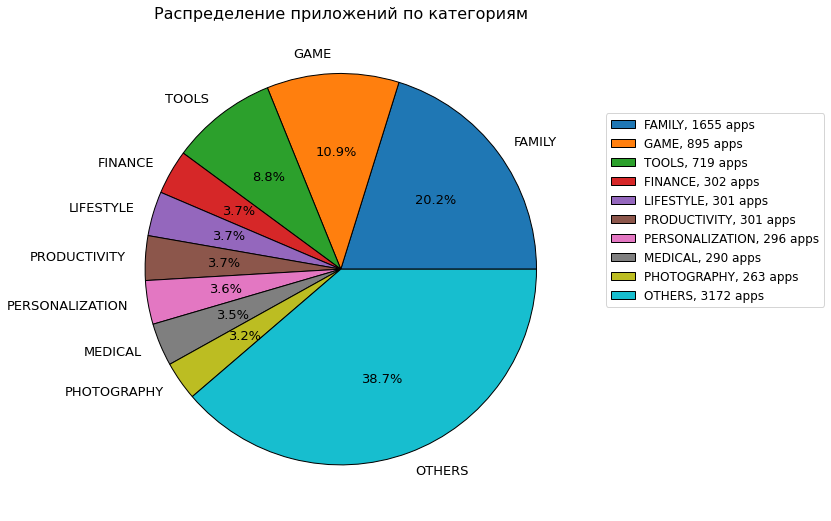

In [51]:
plt.figure(figsize=(17, 9))
plt.pie(np.append(q['Num_apps'][0:9].values,q[q.index >= 9]['Num_apps'].sum()), labels = np.append(q['Category'][0:9],'OTHERS'), autopct='%1.1f%%',
        wedgeprops={"edgecolor":"k",'linewidth': 1, 'antialiased': True}, textprops={'fontsize': 13})
plt.title('Распределение приложений по категориям', fontsize = 16)
plt.legend(np.append(q['Category'][0:9] + ', ' + q['Num_apps'][0:9].astype(str) + ' apps',
                     'OTHERS' + ', ' + q[q.index >= 9]['Num_apps'].sum().astype(str) + ' apps'),
           fontsize = 12, loc = 'right', bbox_to_anchor=(0.5, 0.32, 1., 0.602))  
plt.show()

# Определите приложения с наибольшим количеством установок

In [52]:
apps[apps.Installs1 == apps.Installs1.max()][['App','Installs']].sort_values(by = ['App'])

,App,Installs
2544,Facebook,"1,000,000,000+"
451,Gmail,"1,000,000,000+"
3234,Google,"1,000,000,000+"
411,Google Chrome: Fast & Secure,"1,000,000,000+"
3565,Google Drive,"1,000,000,000+"
9844,Google News,"1,000,000,000+"
2884,Google Photos,"1,000,000,000+"
152,Google Play Books,"1,000,000,000+"
5856,Google Play Games,"1,000,000,000+"
3687,Google Play Movies & TV,"1,000,000,000+"


# Постройте график, позволяющий понять, как распределен рейтинг приложений в самых популярных категориях

In [53]:
q['Category'][0:5]

0       FAMILY
1         GAME
2        TOOLS
3      FINANCE
4    LIFESTYLE
Name: Category, dtype: object

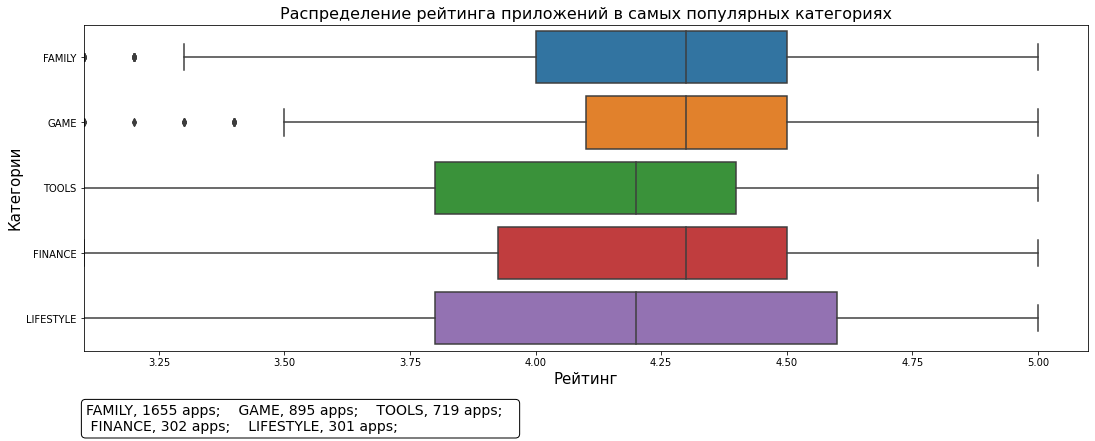

In [54]:
temp = apps[apps.Category.isin(q['Category'][0:5].values)]

fig = plt.figure(figsize=(18, 6))
ax = sns.boxplot(y = temp.Category, x = temp.Rating, orient="h", order=list(q['Category'][0:5]))
ax.set_xlim([3.1, 5.1])
ax.set_xlabel("Рейтинг",fontsize=15)
ax.set_ylabel("Категории",fontsize=15)
plt.title('Распределение рейтинга приложений в самых популярных категориях', fontsize = 16)
ax.annotate(str((q['Category'][0:5] + ', ' + q['Num_apps'][0:5].astype(str) + ' apps').values).replace("'", "").replace('[','').replace(']','').replace('apps','apps;   '),
            xy=(50, -500), xycoords='axes points',xytext = (2, -80),
            size=14,
            bbox=dict(boxstyle='round', fc='w'))
plt.show()

# Проверьте гипотезу, что средний рейтинг платных приложений отличается от бесплатных. Обоснуйте свой вывод.

Посмотрим на распределения оценок приложений в данных категориях

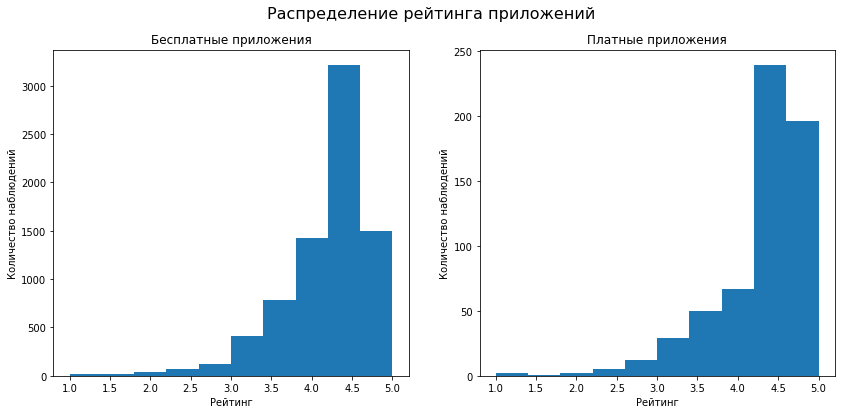

In [55]:
fig, axs = plt.subplots(1,2,figsize=(14,6))
fig.suptitle('Распределение рейтинга приложений', fontsize = 16)
axs[0].hist(apps[apps.Is_paid == 0].Rating.values)
axs[0].set_title('Бесплатные приложения')
axs[0].set_xlabel('Рейтинг')
axs[0].set_ylabel('Количество наблюдений')
axs[1].hist(apps[apps.Is_paid == 1].Rating.values)
axs[1].set_title('Платные приложения')
axs[1].set_xlabel('Рейтинг')
axs[1].set_ylabel('Количество наблюдений')

plt.show()

Как мы видим, распределения имеют явную правостороннюю симметрию. \
Возьмём от них экспоненту

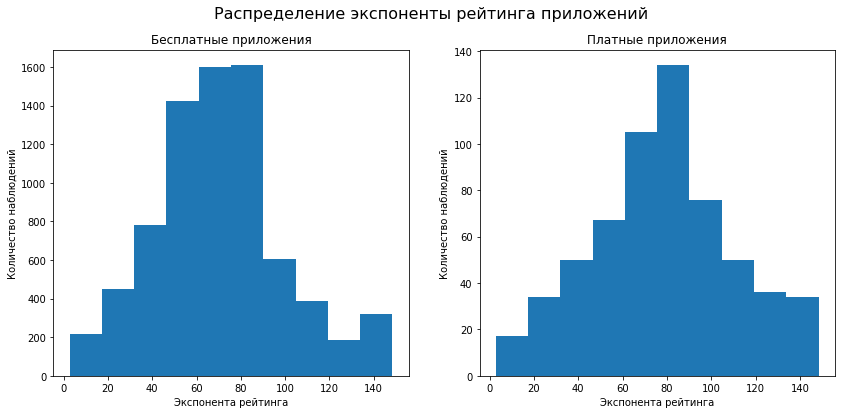

In [56]:
fig, axs = plt.subplots(1,2,figsize=(14,6))
fig.suptitle('Распределение экспоненты рейтинга приложений', fontsize = 16)
axs[0].hist(np.exp(apps[apps.Is_paid == 0].Rating.values))
axs[0].set_title('Бесплатные приложения')
axs[0].set_xlabel('Экспонента рейтинга')
axs[0].set_ylabel('Количество наблюдений')
axs[1].hist(np.exp(apps[apps.Is_paid == 1].Rating.values))
axs[1].set_title('Платные приложения')
axs[1].set_xlabel('Экспонента рейтинга')
axs[1].set_ylabel('Количество наблюдений')
plt.show()

In [57]:
np.var(np.exp(apps[apps.Is_paid == 1].Rating.values)),np.var(np.exp(apps[apps.Is_paid == 0].Rating.values))

(1016.2268286590487, 870.3377923305017)

Экспонента рейтинга в обеих категориях имеет форму, близкую к нормальному распределению. \
Дисперсии обеих выборок приблизительно равны.\
В таком случае выборки удовлетворяют условиям T-теста Стьюдента, и мы можем применять данный T-критерий, чтобы сравнить средние обеих выборок.

In [58]:
stat, p =scipy.stats.ttest_ind(np.exp(apps[apps.Is_paid == 1].Rating.values), np.exp(apps[apps.Is_paid == 0].Rating.values),equal_var=True)
print('P-value равно', p)

P-value равно 2.5829728095871055e-09


In [59]:
print('Средний рейтинг платных приложений:',round(apps[apps.Is_paid == 1].Rating.mean(),2))
print('Средний рейтинг бесплатных приложений:',round(apps[apps.Is_paid == 0].Rating.mean(),2))

Средний рейтинг платных приложений: 4.26
Средний рейтинг бесплатных приложений: 4.17


Результаты применения t-теста позволяют нам отвергнуть гипотезу о равенстве двух выборок на 1%-ном уровне значимости. \
Таким образом, средний рейтинг платных приложений значимо выше, чем бесплатных

# В какой категории приложений больше всего положительно окрашенных отзывов?

Объединим наборы данных apps и reviews в один

In [60]:
apps_merged = pd.merge(reviews, apps, on='App')

Как можно заметить, больше всего положительных отзывов имеет категория 'GAME'

In [61]:
grouped_app_cat = apps_merged[apps_merged.Sentiment == 1].groupby(['App','Category']).Sentiment.size().reset_index()
grouped_app_cat.groupby('Category').Sentiment.sum().sort_values(ascending = False).head()

Category
GAME                  3358
FAMILY                2206
HEALTH_AND_FITNESS    1754
DATING                1068
TRAVEL_AND_LOCAL      1034
Name: Sentiment, dtype: int64

Однако в данной ситуации не сделана поправка на количество приложений в каждой из категорий. Посчитаем, какой процент от общего числа отзывов в категории занимают положительные.

In [62]:
round(100*(apps_merged[apps_merged.Sentiment == 1].groupby(['App','Category']).Sentiment.size().reset_index().groupby('Category').Sentiment.sum()/
apps_merged.groupby(['App','Category']).Sentiment.size().reset_index().groupby('Category').Sentiment.sum()).sort_values(ascending = False),1).head()

Category
COMICS                86.7
AUTO_AND_VEHICLES     81.7
EVENTS                79.1
HEALTH_AND_FITNESS    78.0
EDUCATION             75.2
Name: Sentiment, dtype: float64

Таблица показывает, что в категории 'COMICS' больше всего положительных отзывов в процентном соотношении. Категория 'GAME', имеющая наибольшее число положительных отзывов, по их процентному соотношению среди всех в категории не попала даже в Топ-5

# Предложите собственную гипотезу и расскажите по ней некую «историю», подкрепив рассказ выводами из данных.

Гипотеза: \
Приложения, представленные в нескольких жанрах, имеют в среднем больше установок и выше рейтинг

Такие приложения отличаются наличием ';' в столбце 'Genre'

Посмотрим на показатели по мультижанровым приложениям:

In [63]:
print('Средний рейтинг приложений:', apps[apps.Genres.str.contains(';')].Rating.mean())

Средний рейтинг приложений: 4.284251968503935


In [64]:
print('Средняя кодировка количества установок приложений:', apps[apps.Genres.str.contains(';')].Installs1.mean())

Средняя кодировка количества установок приложений: 12.196850393700787


In [65]:
print('Общее число приложений:', len(apps[apps.Genres.str.contains(';')].Rating))

Общее число приложений: 381


Приложения, имеющие только 1 жанр:

In [66]:
print('Средний рейтинг приложений:', apps[apps.Genres.str.contains(';') == False].Rating.mean())

Средний рейтинг приложений: 4.167592474081665


In [67]:
print('Средняя кодировка количества установок приложений:', apps[apps.Genres.str.contains(';') == False].Installs1.mean())

Средняя кодировка количества установок приложений: 11.071291437348009


In [68]:
print('Общее число приложений:', len(apps[apps.Genres.str.contains(';') == False].Rating))

Общее число приложений: 7813


Можем заметить, что хоть мультижанровых приложений и меньше, их рейтинг и количество установок в среднем выше, чем у одножанровых приложений

Как мы видим, распределение экспоненты рейтинга приложений и в случае мультижанровых, и в случае одножанровых приложений практически нормально, что позволяет нам сравнить их средние с помощью t-критерия Стьюдента.\
Дисперсии выборок различны, поэтому сделаем в тесте на это поправку.

In [69]:
np.var(np.exp(apps[apps.Genres.str.contains(';')].Rating.values)), np.var(np.exp(apps[apps.Genres.str.contains(';') == False].Rating.values))

(452.140333121014, 905.4457021668154)

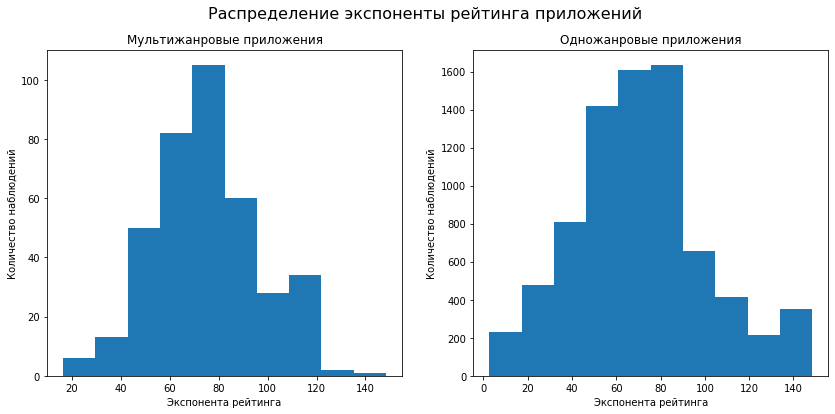

In [70]:
fig, axs = plt.subplots(1,2,figsize=(14,6))
fig.suptitle('Распределение экспоненты рейтинга приложений', fontsize = 16)
axs[0].hist(np.exp(apps[apps.Genres.str.contains(';')].Rating.values))
axs[0].set_title('Мультижанровые приложения')
axs[0].set_xlabel('Экспонента рейтинга')
axs[0].set_ylabel('Количество наблюдений')
axs[1].hist(np.exp(apps[apps.Genres.str.contains(';') == False].Rating.values))
axs[1].set_title('Одножанровые приложения')
axs[1].set_xlabel('Экспонента рейтинга')
axs[1].set_ylabel('Количество наблюдений')
plt.show()

In [71]:
scipy.stats.ttest_ind(np.exp(apps[apps.Genres.str.contains(';')].Rating),np.exp(apps[apps.Genres.str.contains(';') == False].Rating),
                      equal_var = False)

Ttest_indResult(statistic=3.024756893218238, pvalue=0.0026284163188018536)

Тест Стьюдента показывает, что на 1%-ном уровне значимости мы можем отвегнуть гипотезу о равенстве средних данных категорий приложений, что означает, что средний рейтинг между ними действительно различен.

Теперь перейдем к числу установок. \
Будем сравнивать число установок, закодированное в шкалу от 1 до 20, т.к. такой способ менее чувствителен к выбросам (слишком экстремальным значениям).\
Распределение числа установок мультижанровых и одножанровых приложений не похоже на нормальное, поэтому в данном случае используем ранговый тест Манна-Уитни.

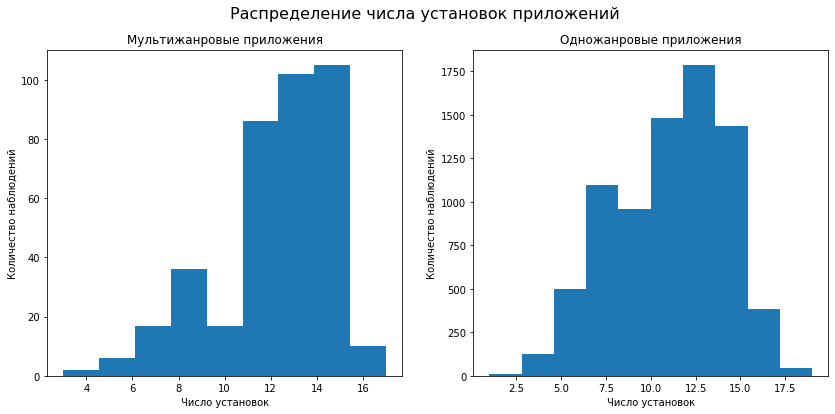

In [72]:
fig, axs = plt.subplots(1,2,figsize=(14,6))
fig.suptitle('Распределение числа установок приложений', fontsize = 16)
axs[0].hist(apps[apps.Genres.str.contains(';')].Installs1.values, bins =9)
axs[0].set_title('Мультижанровые приложения')
axs[0].set_xlabel('Число установок')
axs[0].set_ylabel('Количество наблюдений')
axs[1].hist(apps[apps.Genres.str.contains(';') == False].Installs1.values,bins = 10)
axs[1].set_title('Одножанровые приложения')
axs[1].set_xlabel('Число установок')
axs[1].set_ylabel('Количество наблюдений')
plt.show()

In [73]:
scipy.stats.mannwhitneyu(apps[apps.Genres.str.contains(';')].Installs1.values,apps[apps.Genres.str.contains(';') == False].Installs1.values)

MannwhitneyuResult(statistic=1181012.0, pvalue=3.4473465718296836e-12)

Результаты теста показывают, что на 1%-ном уровне значимости гипотезу о равенстве средних данных двух типов приложений можно отклонить, что означает, что мультижанровые приложения действительно имеют большее число установок в среднем, чем одножанровые

Проверим, не могут ли большее число установок и более высокий рейтинг мультижанровых приложений быть связаны с тем, что они сделаны в самых лучших жанрах и категориях

Как мы видим, подавляющее большинство мультижанровых приложений имеет категорию 'FAMILY'

In [74]:
apps[apps.Genres.str.contains(';')].loc[:,'Category_ART_AND_DESIGN':'Category_WEATHER'].sum().sort_values(ascending = False)[0:5]

Category_FAMILY            341
Category_EDUCATION          13
Category_PARENTING          10
Category_ENTERTAINMENT       5
Category_ART_AND_DESIGN      4
dtype: int64

In [75]:
apps[apps.Category == 'FAMILY'].Installs1.mean(), apps[apps.Category != 'FAMILY'].Installs1.mean()

(10.663444108761329, 11.240097874292704)

In [76]:
apps[apps.Category == 'FAMILY'].Rating.mean(), apps[apps.Category != 'FAMILY'].Rating.mean()

(4.184229607250755, 4.17017892644136)

Однако средний рейтинг и среднее число установок приложений данной категории почти не отличаются от средних значений приложений других категорий, следовательно, хорошие показатели мультижанровых приложений нельзя объяснить удачным выбором категории

Теперь проведем аналогичное исследование жанров мультижанровых приложений

In [77]:
top_multi = apps[apps.Genres.str.contains(';')].loc[:,'Social':'Travel & Local'].sum().sort_values(ascending = False)[0:3]
top_multi

Puzzle               24
Racing               17
Books & Reference     2
dtype: int64

In [78]:
print('Средний рейтинг всех приложений =',round(apps.Rating.mean(),2), 'Среднее количество установок =', round(apps.Installs1.mean(),2),'\n')
print('Самые популярные жанры мультижанровых приложений:')
for i in range(len(top_multi.index)):
  print('Жанр',top_multi.index[i],', Средний рейтинг', round(apps[apps[top_multi.index[i]] == 1].Rating.mean(),2),'Среднее количество установок',round(apps[apps[top_multi.index[i]] == 1].Installs1.mean(),2))

Средний рейтинг всех приложений = 4.17 Среднее количество установок = 11.12 

Самые популярные жанры мультижанровых приложений:
Жанр Puzzle , Средний рейтинг 4.37 Среднее количество установок 12.15
Жанр Racing , Средний рейтинг 4.17 Среднее количество установок 13.29
Жанр Books & Reference , Средний рейтинг 4.34 Среднее количество установок 10.67


Как мы можем заметить, самые популярные жанры мультижанровых приложений имеют рейтинг намного выше, чем в среднем по датасету. Это может свидетельствовать о том, что более высокий рейтинг мультижанровых приложений связан с тем, что они намеренно сделаны в лучших жанрах.\
Число установок самых популярных жанров мультижанровых приложений бывает как больше среднего по датасету, так и меньше. Следовательно, гипотеза о том, что большее число установок мультижанровых приложений связано с удачным выбором жанров, является в данном случае менее вероятной. Скорее всего, большее число установок приложений данного типа действительно связано с большим охватом аудитории, получаемым за счёт указания нескольких жанров.

# Постройте модель, предсказывающую рейтинг приложения, оцените ее качество.

In [79]:
from sklearn.linear_model import LinearRegression
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.linear_model import  LassoLarsIC

In [80]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

In [81]:
new_apps = apps[apps.columns.drop(['App','Category','Installs','Content Rating','Genres','Last Updated','Genre1','Genre2'])]

Посмотрим на корреляцию выходной переменной Rating со всеми другими

Заметим, что максимальная корреляция по модулю составляет 0.11\
Это говорит о том, что предсказывать рейтинг достаточно сложно из-за отсутствия его достаточной взаимосвязи с предикторами

In [82]:
abs(new_apps.corr()).iloc[0,:].sort_values(ascending = False)

Rating                          1.000000
year                            0.125743
Installs1                       0.085618
Category_TOOLS                  0.076937
Tools                           0.076937
Education                       0.057230
Personalization                 0.057154
Category_PERSONALIZATION        0.057154
Reviews                         0.055116
Android Ver                     0.053621
Size(kB)                        0.052024
Category_DATING                 0.048753
Dating                          0.048753
Category_BOOKS_AND_REFERENCE    0.046508
Books & Reference               0.046327
Category_GAME                   0.045904
Puzzle                          0.045733
Is_paid                         0.045361
Category_EDUCATION              0.038290
Entertainment                   0.038086
Events                          0.036362
Category_EVENTS                 0.036362
Installs2                       0.035034
Rating_Teen                     0.034721
Video Players & 

Удалим признаки, которые повторяют/ почти повторяют другие 

In [83]:
new_apps = new_apps[new_apps.columns.drop(['Category_TOOLS','Category_PERSONALIZATION','Category_BOOKS_AND_REFERENCE',
                                       'Category_DATING','Category_EVENTS','Category_VIDEO_PLAYERS','Category_MAPS_AND_NAVIGATION',
                                       'Category_TRAVEL_AND_LOCAL','Category_ART_AND_DESIGN','Category_LIFESTYLE',
                                       'Category_HEALTH_AND_FITNESS','Category_FINANCE','Category_SOCIAL','Category_PARENTING',
                                       'Category_COMMUNICATION','Category_BEAUTY','Category_SHOPPING',
                                       'Category_NEWS_AND_MAGAZINES','Category_WEATHER','Category_PHOTOGRAPHY',
                                       'Category_BUSINESS','Category_PRODUCTIVITY','Category_HOUSE_AND_HOME',
                                       'Category_MEDICAL','Category_LIBRARIES_AND_DEMO','Category_AUTO_AND_VEHICLES','Category_COMICS',
                                       'Category_FOOD_AND_DRINK','Category_SPORTS'])]

In [84]:
new_apps.head()

,Rating,Reviews,Size(kB),Price,Current Ver,Android Ver,Category_EDUCATION,Category_ENTERTAINMENT,Category_FAMILY,Category_GAME,Installs1,Installs2,Is_paid,Content_Rating1,Rating_Adults only 18+,Rating_Everyone,Rating_Everyone 10+,Rating_Mature 17+,Rating_Teen,Rating_Unrated,Beauty,Events,Board,Maps & Navigation,Lifestyle,Art & Design,Health & Fitness,Brain Games,News & Magazines,Shopping,Educational,Business,House & Home,Finance,Music,Role Playing,Auto & Vehicles,Trivia,Video Players & Editors,Adventure,Food & Drink,Arcade,Personalization,Action & Adventure,Creativity,Word,Card,Pretend Play,Libraries & Demo,Productivity,Entertainment,Sports,Simulation,Strategy,Music & Audio,Parenting,Dating,Social,Books & Reference,Racing,Tools,Casino,Puzzle,Travel & Local,Education,Weather,Comics,Action,Communication,Casual,Photography,Music & Video,Medical,year,month,day
0,4.1,159,19456.0,0.0,1.000000,4.0,0,0,0,0,9,30000.0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2018,1,7
2,4.7,87510,8908.8,0.0,1.000000,4.0,0,0,0,0,14,7500000.0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2018,8,1
3,4.5,215644,25600.0,0.0,2.228955,4.0,0,0,0,0,16,75000000.0,0,2,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2018,6,8
4,4.3,967,2867.2,0.0,1.000000,4.0,0,0,0,0,11,300000.0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2018,6,20
5,4.4,167,5734.4,0.0,1.000000,2.0,0,0,0,0,10,75000.0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2017,3,26


Посмотрим, между какими предикторами сильная корреляция. Возможно, какие-то из них могут быть удалены

In [85]:
for i in range(len(new_apps.columns)):
  for j in range(i):
    if(new_apps[new_apps.columns[i]].corr(new_apps[new_apps.columns[j]]) > 0.3):
      print(new_apps.columns[i],new_apps.columns[j],new_apps[new_apps.columns[i]].corr(new_apps[new_apps.columns[j]]))

Category_GAME Size(kB) 0.3236865826607604
Installs2 Reviews 0.6122850342720773
Rating_Everyone 10+ Content_Rating1 0.4431210832915993
Rating_Mature 17+ Content_Rating1 0.7669504540790307
Rating_Teen Content_Rating1 0.3234043875195262
Arcade Category_GAME 0.3971543627332255
Entertainment Category_ENTERTAINMENT 0.4031439389676733
Entertainment Category_FAMILY 0.3987850710015998
Dating Content_Rating1 0.43239227754257464
Dating Rating_Mature 17+ 0.5616996544266445
Education Category_EDUCATION 0.4091943015781909
Education Category_FAMILY 0.3904391423055385
Action Category_GAME 0.5377849153061852
year Android Ver 0.5057364936497001


Проверим несколько вариантов кодирования категориальных переменных и выберем наилучший

In [86]:
pos_col = [['Rating','Reviews','Installs1','Content_Rating1'],
           ['Rating','Reviews','Installs1','Rating_Adults only 18+','Rating_Everyone','Rating_Everyone 10+','Rating_Mature 17+','Rating_Teen','Rating_Unrated'],
           ['Rating','Reviews','Installs2','Rating_Adults only 18+','Rating_Everyone','Rating_Everyone 10+','Rating_Mature 17+','Rating_Teen','Rating_Unrated'],
           ['Rating','Reviews','Installs2','Content_Rating1']]

In [87]:
y = new_apps.loc[:,'Rating']

reg = LinearRegression()

In [88]:
for i in range(len(pos_col)):
  x = new_apps.drop(pos_col[i],axis = 1)
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
  model = reg.fit(x_train, y_train)
  y_pred = reg.predict(x_test)
  params = np.append(reg.intercept_,reg.coef_)
  print(i,round(sklearn.metrics.r2_score(y_test, y_pred),4))

0 0.0341
1 0.0342
2 0.0376
3 0.0374


Наилучший результат по метрике R^2 показывает модель со 2 набором предикторов

In [89]:
x = new_apps.drop(pos_col[2],axis = 1)

In [90]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [91]:
model = reg.fit(x_train, y_train)

In [92]:
y_pred = reg.predict(x_test)

In [93]:
params = np.append(reg.intercept_,reg.coef_)

In [94]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('Mean absolute error = ', mae)
print('Mean squared error = ', mse)

Mean absolute error =  0.3707764544501665
Mean squared error =  0.2728679623213507


In [95]:
sklearn.metrics.r2_score(y_test, y_pred)

0.03756881718676708

In [96]:
model.score(x_train,y_train)

0.0661280354197562

Наилучшая модель показала R^2 = 0.036, что является очень низким показателем качества модели. По сути данный результат близок к нулевому: R^2 модели, предсказывающей среднее значение выходной переменной = 0.\
Такое плохое качество модели неудивительно: рейтинг приложения предсказать практически невозможно по косвенным признакам. Важно качество реализации приложения, в данном датасете не представленное

In [97]:
# Lasso regularization
clf = linear_model.Lasso(alpha=0.05)
clf.fit(x_train, y_train)

Lasso(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [98]:
model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(x_train, y_train)
alpha_aic_ = model_aic.coef_

In [99]:
y_pred_lasso = clf.predict(x_test)
y_pred_lasso_aic = model_aic.predict(x_test)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso_aic = mean_absolute_error(y_test, y_pred_lasso_aic)
print('Mean absolute error Lasso = ', mae_lasso)
print('Mean squared error Lasso = ', mse_lasso)

Mean absolute error Lasso =  0.38062668450117604
Mean squared error Lasso =  0.280636761385428


In [100]:
sklearn.metrics.r2_score(y_test, y_pred_lasso)

0.01016752606900373

R^2 линейной регрессии с Лассо-регуляризацией = 0.01. Применение Лассо-регуляризации к данной задаче неоправдано

Попробуем построить линейную регрессию со стандартизированными значениями

In [101]:
from sklearn import preprocessing

norm = preprocessing.StandardScaler()
norm.fit(x_train)
x_sc_train = norm.transform(x_train)
x_sc_train = pd.DataFrame(x_sc_train, index=x_train.index, columns = x_train.columns)

norm = preprocessing.StandardScaler()
norm.fit(x_test)
x_sc_test = norm.transform(x_test)
x_sc_test = pd.DataFrame(x_sc_test, index=x_test.index, columns = x_test.columns)

In [102]:
reg = LinearRegression()

In [103]:
model = reg.fit(x_sc_train, y_train)

In [104]:
y_pred = reg.predict(x_sc_test)

In [105]:
params = np.append(reg.intercept_,reg.coef_)

In [106]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('Mean absolute error = ', mae)
print('Mean squared error = ', mse)

Mean absolute error =  0.37218359923707883
Mean squared error =  0.2731399244175675


In [107]:
sklearn.metrics.r2_score(y_test, y_pred)

0.03660958107961998

Модель со стандартизированными значениями показала коэффициент детерминации меньше, чем без стандартизации. \
Следовательно, в данной задаче стандартизацию лучше не проводить

In [108]:
x = new_apps.drop(pos_col[2],axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
model = reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
params = np.append(reg.intercept_,reg.coef_)

xx = []
for i in range(len(y_test)):
    xx.append(i)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


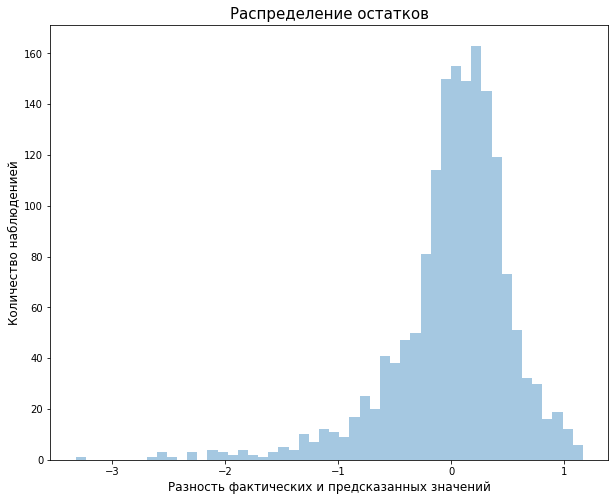

In [109]:
# Распределение остатков наилучшей модели
plt.figure(figsize=(10, 8))
y_pred_all = np.array(reg.predict(x_test))
y1 = np.array(y_test)
y2 = np.array(y_pred_all)
y_diff = y1 - y2
sns.distplot(y_diff, kde=False)
plt.title('Распределение остатков',fontsize = 15)
plt.xlabel('Разность фактических и предсказанных значений',fontsize = 12)
plt.ylabel('Количество наблюденией',fontsize = 12)
plt.show()

Можем заметить, что левый хвост гистограмы тяжелее, чем правый.\
Это говорит о том, что модель стремиться предсказывать в среднем значения больше, чем есть на самом деле. Маленькие значения рейтинга предсказываются хуже, чем большие

Это видно и на следующей диаграмме.\
Также диаграмма показывает, что построенная модель стремится выдать значения в узком диапазоне и не пытается угадать слишком большие или слишком маленькие значения рейтинга. Это говорит о ее плохом качестве и низкой предсказательной силе.

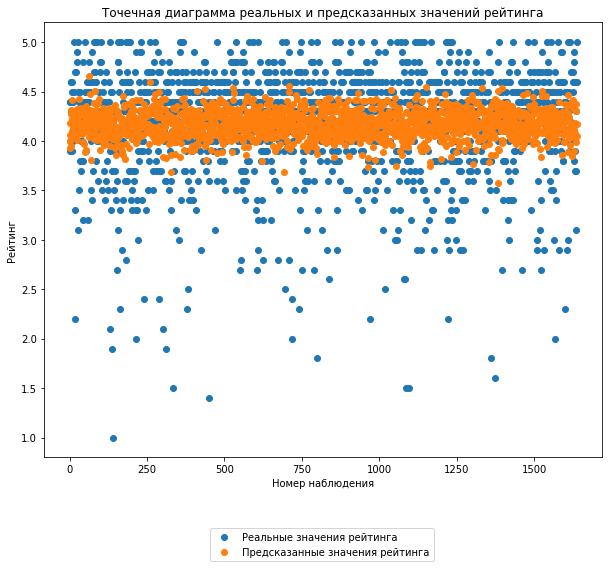

In [110]:
plt.figure(figsize=(10, 8))
plt.scatter(xx, y_test, label = u'Реальные значения рейтинга')
plt.scatter(xx, y_pred, label = u'Предсказанные значения рейтинга')
plt.title(u'Точечная диаграмма реальных и предсказанных значений рейтинга')
plt.legend(loc="center right",borderaxespad=0.1, bbox_to_anchor=(0.7, -0.2))
plt.xlabel(u'Номер наблюдения')
plt.ylabel(u'Рейтинг')
plt.show()